# Analyzing Tennis Player Data


### Name: Catherine Hu



In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")


In [7]:
df = pd.read_csv('edited_players.csv')
print(df.shape)
df.columns

(1388, 9)


Index(['player_id', 'years_since_pro', 'turned_pro', 'height_cm', 'weight_kg',
       'birth_year', 'age', 'handedness', 'backhand'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1388 entries, 0 to 1387
Data columns (total 9 columns):
player_id          1388 non-null object
years_since_pro    1388 non-null int64
turned_pro         1388 non-null int64
height_cm          1352 non-null float64
weight_kg          1360 non-null float64
birth_year         1378 non-null float64
age                1388 non-null int64
handedness         561 non-null object
backhand           561 non-null object
dtypes: float64(3), int64(3), object(3)
memory usage: 97.7+ KB


In [9]:
df = df.drop(['turned_pro', 'birth_year'], axis=1)

In [10]:
df.head()

,player_id,years_since_pro,height_cm,weight_kg,age,handedness,backhand
0,g077,74,188.0,82.0,92,NaN,NaN
1,d133,60,183.0,72.0,84,NaN,NaN
2,g075,60,185.0,89.0,83,NaN,NaN
3,r071,56,175.0,77.0,74,R,One
4,g076,55,188.0,82.0,78,NaN,NaN


In [11]:
df.describe()

,years_since_pro,height_cm,weight_kg,age
count,1388.000000,1352.000000,1360.000000,1388.000000
mean,23.281700,184.199704,78.743382,56.828530
std,9.833321,9.589274,6.608212,167.616746
min,3.000000,0.000000,57.000000,20.000000
25%,16.000000,180.000000,75.000000,35.000000
50%,23.000000,185.000000,78.500000,42.000000
75%,30.000000,188.000000,83.000000,50.000000
max,74.000000,211.000000,108.000000,2020.000000


In [12]:
duplicate_rows_df = df[df.duplicated()]
df = df.drop_duplicates()

In [13]:
print(df.isnull().sum())
df = df.dropna()  
print(df.isnull().sum()) 


player_id            0
years_since_pro      0
height_cm           36
weight_kg           28
age                  0
handedness         827
backhand           827
dtype: int64
player_id          0
years_since_pro    0
height_cm          0
weight_kg          0
age                0
handedness         0
backhand           0
dtype: int64


In [14]:
print(df.shape)
indexNames = df[df['age'] >= 40 ].index
df.drop(indexNames , inplace=True)
print(df.shape)

(551, 7)
(415, 7)


In [15]:
df.describe()

,years_since_pro,height_cm,weight_kg,age
count,415.000000,415.000000,415.000000,415.000000
mean,13.142169,185.889157,80.036145,31.691566
std,4.751967,6.713405,6.881758,4.751944
min,3.000000,168.000000,64.000000,20.000000
25%,9.000000,183.000000,75.000000,28.000000
50%,13.000000,185.000000,80.000000,32.000000
75%,17.000000,191.000000,84.000000,35.000000
max,23.000000,211.000000,108.000000,39.000000


In [16]:
print(df.shape)
df.columns

(415, 7)


Index(['player_id', 'years_since_pro', 'height_cm', 'weight_kg', 'age',
       'handedness', 'backhand'],
      dtype='object')

In [17]:
df.head()

,player_id,years_since_pro,height_cm,weight_kg,age,handedness,backhand
686,l397,23,185.0,73.0,39,L,One
712,v254,23,183.0,73.0,39,R,One
723,d362,22,188.0,88.0,39,R,One
731,f324,22,185.0,85.0,39,R,One
740,h432,22,178.0,77.0,39,R,Two


In [18]:
df.tail()

,player_id,years_since_pro,height_cm,weight_kg,age,handedness,backhand
1383,te51,4,193.0,83.0,22,R,One
1384,tf58,4,170.0,68.0,23,R,Two
1385,e865,3,201.0,82.0,24,R,One
1386,kd35,3,188.0,75.0,25,R,Two
1387,n771,3,188.0,80.0,25,L,Two


In [19]:
df.describe()

,years_since_pro,height_cm,weight_kg,age
count,415.000000,415.000000,415.000000,415.000000
mean,13.142169,185.889157,80.036145,31.691566
std,4.751967,6.713405,6.881758,4.751944
min,3.000000,168.000000,64.000000,20.000000
25%,9.000000,183.000000,75.000000,28.000000
50%,13.000000,185.000000,80.000000,32.000000
75%,17.000000,191.000000,84.000000,35.000000
max,23.000000,211.000000,108.000000,39.000000


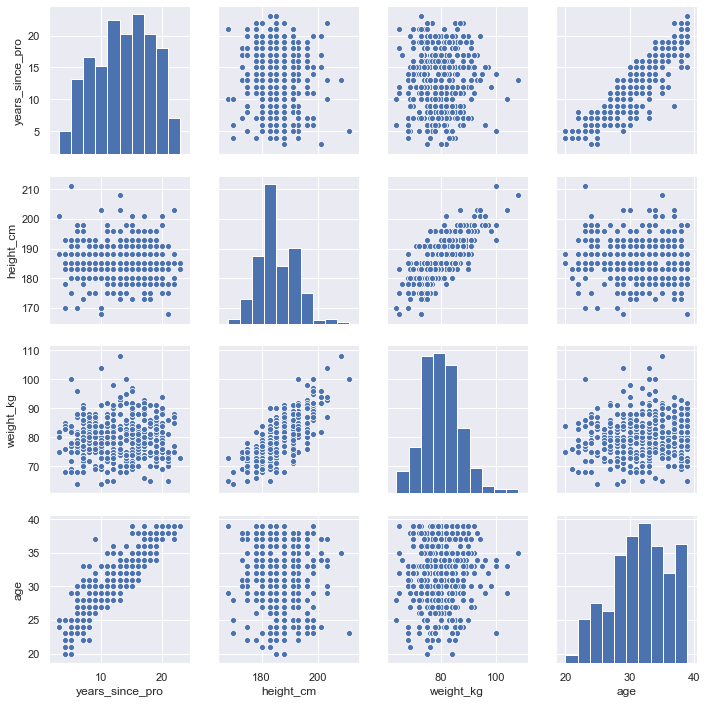

In [20]:
sns.pairplot(df)

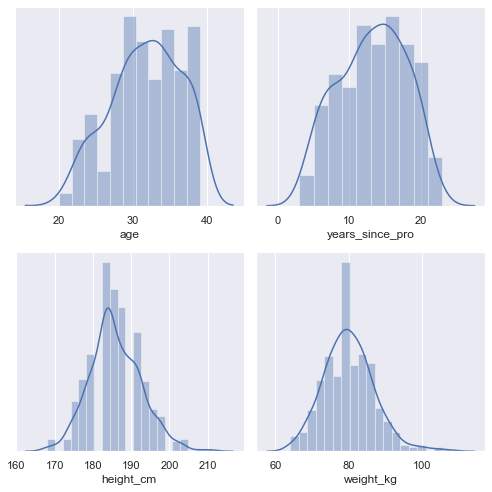

In [33]:
f, axes = plt.subplots(2, 2, figsize=(7, 7))


sns.distplot(df['age'], ax=axes[0,0])
sns.distplot(df['years_since_pro'], ax=axes[0,1])
sns.distplot(df['height_cm'], ax=axes[1,0])
sns.distplot(df['weight_kg'], ax=axes[1,1])

plt.setp(axes, yticks=[])
plt.tight_layout()

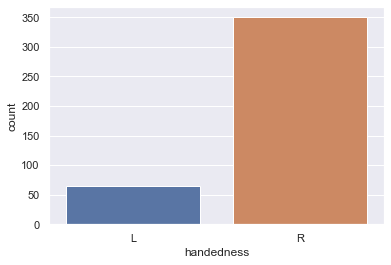

In [22]:
# Visualize categorical data
sns.countplot(df['handedness'], data = df)

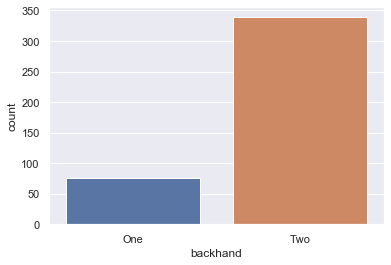

In [23]:
# Visualize categorical data
sns.countplot(df['backhand'], data = df)

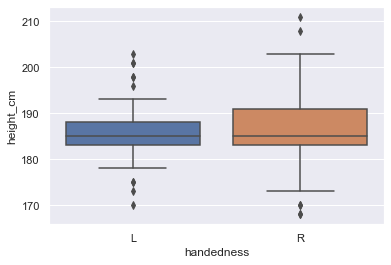

In [24]:
bxplt = sns.boxplot(x = 'handedness', y = 'height_cm', data = df )

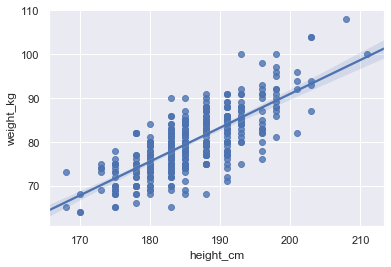

In [25]:
# Simple linear regression with line of best fit and error
sns.regplot(x = 'height_cm', y = "weight_kg", data = df)

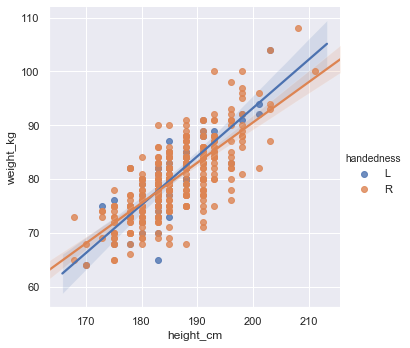

In [26]:
sns.lmplot(x = 'height_cm', y = "weight_kg", data = df, hue = 'handedness')

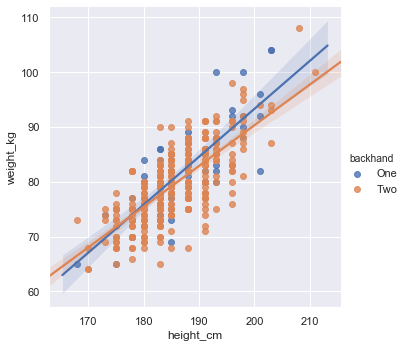

In [27]:
sns.lmplot(x = 'height_cm', y = "weight_kg", data = df, hue = 'backhand')

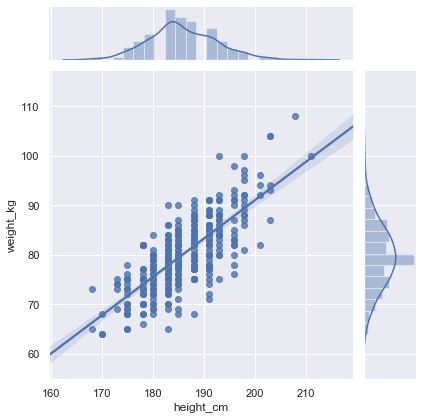

In [28]:
# Linear reg plot plus pdfs from before
sns.jointplot(x = 'height_cm', y = "weight_kg", data = df, kind = 'reg')

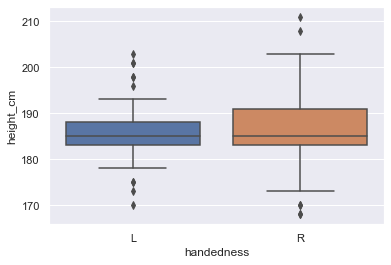

In [29]:
sns.boxplot(x = 'handedness', y = 'height_cm', data = df)

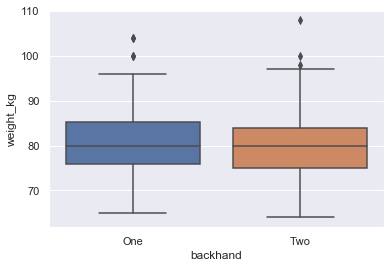

In [30]:
sns.boxplot(x = 'backhand', y = 'weight_kg', data = df)

In [31]:
# Rename
# df = df.rename(columns={"Engine Fuel Type" : "Fuel Type", "Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
# df.head(5)


In [32]:
df.columns

Index(['player_id', 'years_since_pro', 'height_cm', 'weight_kg', 'age',
       'handedness', 'backhand'],
      dtype='object')